# I) IMPORTAR IMAGENES DE GOOGLE DRIVE A COLABORATY

In [0]:
#####################################################################################
#  Leer de  Google Drive
#####################################################################################

In [0]:
!mkdir -p  train/

In [0]:
!mkdir -p valid/

In [0]:
!mkdir -p data/

In [0]:
!pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
import os
from pathlib import Path

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
""""i=1
for f in file_list[0]:
  print(f)
  #f.GetContentFile('train/0'+str(i)+'.jpg') # Download file as 'cats.png'. 
  i=i+1"""

In [0]:
def ListFolder(parent):
  filelist=[]
  dest=''
  file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % parent}).GetList()
  for f in file_list:
    if f['mimeType']=='application/vnd.google-apps.folder': # if folder
        filelist.append({"id":f['id'],"title":f['title'],"list":ListFolder(f['id'])})
    else:
        filelist.append({"id":f['id'],"title":f['title'],"title1":f['alternateLink']})
        
        
  return filelist

In [0]:
#folder en mi drive

##Test/Test_1
##list_folders=ListFolder('1bBl9KP8gU6B4plPdz_2FlYU0gulvDh_d')

##Train
list_folders=ListFolder('1mqghe8vjhiKXWw-5A-_TGhEjNc1NH2ap')

In [0]:
list_folders

In [0]:
path = Path('data')
dest = ''
existe =False

In [0]:
def if_key_exist(array_key,key):
  keys=[]
  if len(array_key)>0:
    keys=array_key.keys()
    
  if key in keys:
    ban=True
  else:
    ban=False
  
  return ban

In [0]:
def crearDirArchivos(list_f,path,dest): 
  for f in list_f:
    if '.jpeg' in f['title']:
      if dest =='':
        dest = path
      file_obj = drive.CreateFile({'id': f['id']})
      file_obj.GetContentFile(dest/f['title']) #
    else:
      dest = path/f['title']
      existe = os.path.isfile(dest)
      if existe :
        rmtree(dest)
      dest.mkdir(parents=True, exist_ok=True) 
      if( if_key_exist(f,'list') ):
        crearDirArchivos(f['list'],path,dest)

In [0]:
crearDirArchivos(list_folders,path,dest)

# III) CLASIFICAR IMAGENES EN DIRECTORIOS

In [0]:
### SAAM 20190605 ####
import cv2
import numpy as np
font = cv2.FONT_HERSHEY_COMPLEX
import matplotlib.pyplot as plt

import os

import shutil
import errno
import pandas as pd


In [0]:
RUTA_IMAGENES_TRATADAS = "data_treated_tmp/"
RUTA_IMAGENES = "imagenes/"
WIDTH_IMAGE = 150
HEIGHT_IMAGE = 99

In [0]:
mkdir -p data_treated/

In [0]:
def delete_all_folder(folder):
    try:
        shutil.rmtree(folder)  
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            print('ERROR: ' + str(e.errno))
        else:
            print('Directory not copied. Error: %s' % e)

In [0]:
##shutil.rmtree(RUTA_IMAGENES_TRATADAS)  
delete_all_folder(RUTA_IMAGENES_TRATADAS)

##shutil.rmtree(RUTA_IMAGENES)  
delete_all_folder(RUTA_IMAGENES)


In [0]:

def ignore_function(ignore):
    def _ignore_(path, names):
        ignored_names = []
        if ignore in names:
            ignored_names.append(ignore)
        return set(ignored_names)
    return _ignore_


def copy_all_files(src, dest):
    try:
        shutil.copytree(src, dest, ignore=ignore_function('*.py'))
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)
         
  
copy_all_files('data/',RUTA_IMAGENES_TRATADAS)

In [0]:
!mkdir -p imagenes/
!mkdir -p imagenes/0/
!mkdir -p imagenes/1/
!mkdir -p imagenes/2/
!mkdir -p imagenes/3/
!mkdir -p imagenes/4/

In [0]:
##class MyImageClass:
##    def __init__(self, img_name, param_1):
##        self.img = cv2.imread(img_name, param_1)
##        self.__name = img_name

##    def __str__(self):
##       return self.__name
ruta_datos = "data/"
lista_fotos = os.listdir(ruta_datos)
len(lista_fotos)

1264

In [0]:
################################################################################################################################################
######################################### Colocar las imagenes en carpetas de acuerdo a su fase ################################################
################################################################################################################################################


def resize_image(folder_name_image_initial, folder_name_image_final, width, heigth):
  img = cv2.imread(folder_name_image_initial,0)
  ##plt.imshow(img)
  ##img.shape
  
  dim = (width,heigth) 
  #maxsize = (2048,2048) 
  #imRes = cv2.resize(img,maxsize,interpolation=cv2.INTER_AREA)
  img_tmp_1 = cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
  cv2.imwrite(folder_name_image_final, img_tmp_1)
  
  
def copy_file(src, dest):
    try:
        if os.path.isfile(src):
          resize_image(src,dest,WIDTH_IMAGE,HEIGHT_IMAGE)
          ##shutil.copyfile(src, dest)
        else:
          print('File NO exists: ' + src)
        
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)
         
  

      
      
################################################################################################################################################
################################################################################################################################################

In [0]:


df_label = pd.read_csv("trainLabels.csv")
##df_label.describe
##df_label.shape
for index, row in df_label.iterrows():
    print('Foto : ' + str(index))
    nombre_archivo_a_copiar = row['image'] + ".jpeg"
    ruta_archivo_a_copiar = os.path.join(RUTA_IMAGENES_TRATADAS, nombre_archivo_a_copiar)
    ##print(ruta_archivo_a_copiar)
    ruta_archivo_destino = os.path.join(RUTA_IMAGENES + str(row['level']) + "/", nombre_archivo_a_copiar)
    ##print(ruta_archivo_destino)
    ##if index > 100:
    ##  break
    copy_file(ruta_archivo_a_copiar,ruta_archivo_destino)
    #shutil.copyfile(archivo_a_copiar,ruta_destino)



# IV) REDES NEURONALES

In [0]:
###############################################################################################################################################
################################################### CNN FASTAI models.resnet34 ################################################################
###############################################################################################################################################
##### 2 CAPAS

In [0]:
###############################################################################################################################################
################################################### CNN FASTAI models.models.resnet50 #########################################################
###############################################################################################################################################
##### 3 CAPAS

In [0]:
from fastai import *
from fastai.vision import *
from PIL import Image

folders = ['0','1','2','3','4']
classes = ['0','1','2','3','4']

WIDTH_IMAGE = 300
np.random.seed(21)
## valid_pct: indicate the percentage of the total images to use as the validation set
                                  
data = ImageDataBunch.from_folder(RUTA_IMAGENES, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(), size=WIDTH_IMAGE, num_workers=2).normalize(imagenet_stats)
#data = ImageDataBunch.from_folder(RUTA_IMAGENES, train=".", valid_pct=0.2,
#        ds_tfms=get_transforms(), num_workers=4).normalize(imagenet_stats)

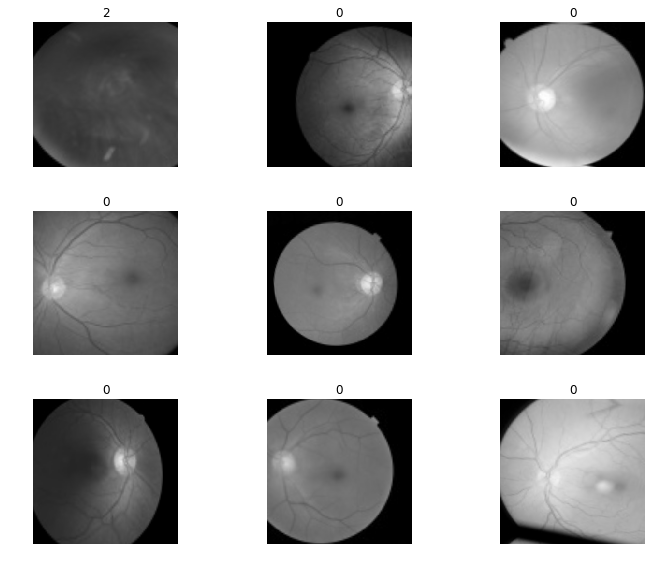

In [0]:
data.show_batch(rows=3, figsize=(10,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4'], 5, 1138, 126)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.962131,1.532244,0.706349,23:12
1,1.688711,1.132299,0.380952,23:14
2,1.402610,0.913268,0.246032,23:14
3,1.218193,0.877778,0.246032,23:16
4,1.114336,0.855162,0.246032,23:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


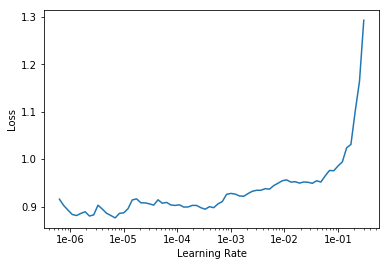

In [0]:

learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

# II) TRATAMIENTO IMAGENES

In [0]:
###############################################################################################################################################
######################################################### TRATAMIENTO => MUESCA ###############################################################
###############################################################################################################################################

In [1]:
#img = cv2.imread("1016_left.jpeg",0)
#img = cv2.imread("1005_left.jpeg",0)
#img = cv2.imread("1018_left.jpeg",0)
#img = cv2.imread("10006_right.jpeg",0)
#img = cv2.imread("10040_left.jpeg",0)
#img = cv2.imread("1005_left.jpeg",0)
nombre_archivo = lista_fotos[1]
#nombre_archivo = lista_fotos[19]
ruta_nombre_archivo = ruta_datos + nombre_archivo
img = cv2.imread(ruta_nombre_archivo,0)

plt.imshow(img)

#img = MyImageClass("1005_left.jpeg",0)
#str(img)

NameError: ignored

In [0]:
blur = cv2.GaussianBlur(img,(5,5),0)
_,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#plt.imshow(img)
img.shape


In [0]:
#r = 300.0 / img.shape[1]
#dim = (300, int(img.shape[0] * r))

dim = (300,198) 
#maxsize = (2048,2048) 
#imRes = cv2.resize(img,maxsize,interpolation=cv2.INTER_AREA)
img_tmp_1 = cv2.resize(img,dim,interpolation=cv2.INTER_AREA)

In [0]:
plt.imshow(img_tmp_1)
img_tmp_1.shape

In [0]:
##ruta_archivos_tratados = "data_treated/"
###mkdir -p ruta_archivos_tratados

#!mkdir -p data_treated/

In [0]:


#img=imRes
#cv2.imwrite('1016_left_tmp.jpeg',imRes)

#blur = cv2.GaussianBlur(imRes,(5,5),0)0
#_,imRes = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ruta_nombre_archivo_tmp = "data_treated/" + nombre_archivo
cv2.imwrite(ruta_nombre_archivo_tmp, img_tmp_1)

##img_tmp_1 = cv2.imread(ruta_nombre_archivo_tmp)
##plt.imshow(img_tmp_1)



In [0]:
img_patron = cv2.imread('rectangulo_patron_v1.jpeg',0)
plt.imshow(img_patron)

In [0]:
import cv2
import numpy as np

img = cv2.imread(ruta_nombre_archivo_tmp,0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
 
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
len(circles)


In [0]:
for i in circles[0,:]:
	# draw the outer circle
  ##cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
  ####cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  ####cv2.circle(img_patron,(i[0],i[1]),i[2],(0,255,0),2)
  ##cv2.circle(img_patron,(i[0],i[1]),i[2],(255,255,255),2)
  cv2.circle(img_patron,(i[0],i[1]),i[2],(240,255,0),2)
  #cv2.circle(img_patron,(0,0),i[2],(240,255,0),0,0,0)
  
  # draw the center of the circle
  #cv2.circle(img_patron,(i[0],i[1]),2,(0,0,255),3)
  plt.imshow(img_patron)

In [0]:
cv2.imwrite('1016_left_patron.jpeg',cimg)
imRes = cv2.imread('1016_left_patron.jpeg',0)


blur = cv2.GaussianBlur(imRes,(5,5),0)
_,imRes = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(imRes)


In [0]:
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################


In [0]:
#cv2.imwrite('image_gray.jpeg',img)
img_patron = cv2.imread("1016_left_patron3.jpeg")
plt.imshow(img_patron)
imRes.shape

# TMP

In [0]:
#plt.imshow(img)
# convert the images to grayscale
# import the necessary packages
from skimage.measure import compare_ssim

grayA = cv2.cvtColor(imRes, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(img_patron, cv2.COLOR_BGR2GRAY)

	
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

In [0]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
import imutils

thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [0]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imRes, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(img_patron, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
#plt.imshow(img_patron)
#plt.imshow(imRes)
#plt.imshow(img_patron)
plt.imshow(diff)
#plt.imshow(thresh)
#cv2.waitKey(0)



In [0]:
contours = cnts 
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(diff, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 1:
      cv2.putText(diff, "Semi luna", (x, y), font, 15, (204, 255, 153))
      print('Semi luna')
    elif len(approx) == 2:
        cv2.putText(diff, "Triangle", (x, y), font, 15, (204, 255, 153))
        print('Triangle')
    elif len(approx) == 3:
        #cv2.putText(img, "Rectangle", (x, y), font, 15, (204, 255, 153))
        print('Rectangle')
    elif len(approx) == 4:
        #cv2.putText(img, "Rectangle", (x, y), font, 15, (204, 255, 153))
        print('Borde')    
    elif len(approx) == 5:
        cv2.putText(diff, "Pentagon", (x, y), font, 15, (204, 255, 153))
        cv2.rectangle(diff, (x, y), (x+20, y+20), (0, 255, 0), 2,5)
        print('Pentagon')
    elif 6 < len(approx) < 15:
        #cv2.putText(img, "Ellipse", (x, y), font, 15, (204, 255, 153))
        print('Ellipse ',len(approx))
    else:
        cv2.putText(img, "Circle", (x, y), font, 15, (204, 255, 153))
        cv2.circle(img, (x, y), 50, (204, 255, 153), thickness=1, lineType=8, shift=0)
        print('Circle')

In [0]:
#img = cv2.imread("1016_left.jpeg", cv2.IMREAD_GRAYSCALE)
#_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
#_, threshold = cv2.threshold(img, 1000, 662, cv2.THRESH_BINARY)
#_, contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.imread("1016_left.jpeg", cv2.IMREAD_GRAYSCALE)

img = cv2.imread('101_left.jpeg',0)

##img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
##cv2.imwrite('image_test02.jpeg',img)
#th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 115, 2)

##th=cv2.threshold(img,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#_, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
#_, contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

blur = cv2.GaussianBlur(img,(5,5),0)
_,img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img)


In [0]:
_, contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
len(contours)
##contours

In [0]:
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 1:
      cv2.putText(img, "Semi luna", (x, y), font, 15, (204, 255, 153))
      print('Semi luna')
    elif len(approx) == 2:
        cv2.putText(img, "Triangle", (x, y), font, 15, (204, 255, 153))
        print('Triangle')
    elif len(approx) == 3:
        #cv2.putText(img, "Rectangle", (x, y), font, 15, (204, 255, 153))
        print('Rectangle')
    elif len(approx) == 4:
        #cv2.putText(img, "Rectangle", (x, y), font, 15, (204, 255, 153))
        print('Borde')    
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), font, 15, (204, 255, 153))
        cv2.rectangle(img, (x, y), (x+20, y+20), (0, 255, 0), 2,5)
        print('Pentagon')
    elif 6 < len(approx) < 15:
        #cv2.putText(img, "Ellipse", (x, y), font, 15, (204, 255, 153))
        print('Ellipse ',len(approx))
    else:
        cv2.putText(img, "Circle", (x, y), font, 15, (204, 255, 153))
        cv2.circle(img, (x, y), 50, (204, 255, 153), thickness=1, lineType=8, shift=0)
        print('Circle')

In [0]:
plt.imshow(th)

In [0]:
#cv2.imshow("shapes", img)
#cv2.imshow("Threshold", threshold)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [0]:
#####Detectar Contorno

In [0]:
src = cv2.imread("13_left.jpeg")

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 3)

t, dst = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

In [0]:
# obtener los contornos
_, contours, _ = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# dibujar los contornos
cv2.drawContours(src, contours, -1, (0, 0, 255), 2, cv2.LINE_AA)

In [0]:
for c in contours:
    area = cv2.contourArea(c)
    if area > 1000 and area < 10000:
        cv2.drawContours(src, [c], 0, (0, 255, 0), 2, cv2.LINE_AA)

In [0]:
for c in contours:
    
    area = cv2.contourArea(c)
    if area > 1000 and area < 10000:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(src, (x, y), (x + w, y + h), (255, 255, 51), 1, cv2.LINE_AA)

In [0]:
plt.imshow(src)

In [0]:
for c in contours:
    area = cv2.contourArea(c)
    x_0=0
    y_0=0
    diferencial=0
    print(area)
    #if area > 1000 and area < 10000:
    (x, y, w, h) = cv2.boundingRect(c)
    print(x,y)
    #if x>=1296 and x<=2500 and y>=0 and y<=972 :
    cv2.rectangle(src, (x, y), (x + w, y + h), (255, 255, 51), 1, cv2.LINE_AA)
    if (y-y_0)>0:
      diferencial=(x-x_0)/(y-y_0)
    if diferencial>0:
      print(x)